In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import svm

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
df = pd.read_csv('svm_training_data.csv', index_col='cycle_now', parse_dates=True, infer_datetime_format=True)
df.index = pd.to_datetime(df.index,unit='ms')
df.head()

,deviation_a,deviation_b,deviation_c,bid_a,ask_a,bid_b,ask_b,bid_c,ask_c,implicit_result,a_bid_t_est,c_ask_t_est,implicit_result_other,c_bid_t_est,a_ask_t_est
cycle_now,,,,,,,,,,,,,,,
2018-05-08 22:01:20.566,2.054648,-0.33932,0.460860,13.3688,13.3687,118.65,118.82,1579.67,1583.37,996.782576,10941,20025,995.885594,12686,3396
2018-05-08 22:01:21.612,2.054648,-0.33932,0.460860,13.3688,13.3687,118.65,118.82,1579.67,1583.37,996.782576,11045,20130,995.885594,12790,3501
2018-05-08 22:01:22.664,2.054648,-0.33932,0.460860,13.3688,13.3687,118.65,118.82,1579.67,1583.37,996.782576,11150,20235,995.885594,12895,3606
2018-05-08 22:01:23.698,2.054648,-0.33932,0.518036,13.3688,13.3687,118.65,118.82,1579.67,1583.37,996.782576,11254,20280,995.885594,12999,3709
2018-05-08 22:01:24.740,1.364465,-0.33932,0.518036,13.3688,13.3687,118.65,118.82,1579.67,1583.37,996.782576,2637,20384,995.885594,13103,3813


In [4]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [5]:
df['implicit_result'] = df['implicit_result'] - 1000.00
df['implicit_result_other'] = df['implicit_result_other'] - 1000.00
df.head()

,deviation_a,deviation_b,deviation_c,bid_a,ask_a,bid_b,ask_b,bid_c,ask_c,implicit_result,a_bid_t_est,c_ask_t_est,implicit_result_other,c_bid_t_est,a_ask_t_est
cycle_now,,,,,,,,,,,,,,,
2018-05-08 22:01:20.566,2.054648,-0.33932,0.460860,13.3688,13.3687,118.65,118.82,1579.67,1583.37,-3.217424,10941,20025,-4.114406,12686,3396
2018-05-08 22:01:21.612,2.054648,-0.33932,0.460860,13.3688,13.3687,118.65,118.82,1579.67,1583.37,-3.217424,11045,20130,-4.114406,12790,3501
2018-05-08 22:01:22.664,2.054648,-0.33932,0.460860,13.3688,13.3687,118.65,118.82,1579.67,1583.37,-3.217424,11150,20235,-4.114406,12895,3606
2018-05-08 22:01:23.698,2.054648,-0.33932,0.518036,13.3688,13.3687,118.65,118.82,1579.67,1583.37,-3.217424,11254,20280,-4.114406,12999,3709
2018-05-08 22:01:24.740,1.364465,-0.33932,0.518036,13.3688,13.3687,118.65,118.82,1579.67,1583.37,-3.217424,2637,20384,-4.114406,13103,3813


In [6]:
len(df)

9144

In [7]:
#percent of rows where implied profit in at least one direction is greater than 1%
len(df.query('implicit_result>1.0 or implicit_result_other>1.0')) / len(df)

0.3009623797025372

In [8]:
#percent of rows where implied profit in regular direction is greater than 1%
len(df.query('implicit_result>1.0')) / len(df)

0.20275590551181102

<IPython.core.display.Javascript object>


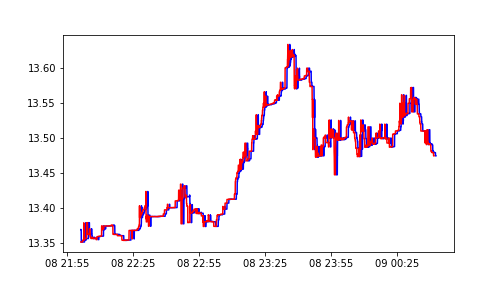

In [9]:
plt.figure(figsize=(7,4))
plt.plot(df['bid_a'], 'b')
plt.plot(df['bid_a'].shift(-50), 'r')
plt.show()

In [10]:
df=df.dropna()
future_df = df.shift(-20)
future_df.head()

,deviation_a,deviation_b,deviation_c,bid_a,ask_a,bid_b,ask_b,bid_c,ask_c,implicit_result,a_bid_t_est,c_ask_t_est,implicit_result_other,c_bid_t_est,a_ask_t_est
cycle_now,,,,,,,,,,,,,,,
2018-05-08 22:01:20.566,0.075328,-0.33932,0.578320,13.3508,13.3666,118.65,118.82,1579.67,1583.37,-1.873528,2310.0,10050.0,-3.957944,14779.0,4924.0
2018-05-08 22:01:21.612,0.075328,-0.33932,0.578320,13.3508,13.3666,118.65,118.82,1579.67,1583.37,-1.873528,2414.0,10154.0,-3.957944,14883.0,5028.0
2018-05-08 22:01:22.664,0.075328,-0.33932,0.613726,13.3508,13.3666,118.65,118.82,1583.37,1583.37,-1.873528,2519.0,10259.0,-1.624953,14919.0,5133.0
2018-05-08 22:01:23.698,0.075328,-0.33932,0.613726,13.3508,13.3666,118.65,118.82,1583.37,1583.37,-1.873528,2624.0,10364.0,-1.624953,15023.0,5238.0
2018-05-08 22:01:24.740,0.075328,-0.33932,0.613726,13.3508,13.3666,118.65,118.82,1583.37,1583.37,-1.873528,2729.0,10469.0,-1.624953,15128.0,5343.0


In [11]:
df['time_delta'] = df.index.to_series().diff().dt.microseconds.div(1000, fill_value=0) # time delta feature in milliseconds

In [12]:
df['future_bid_a'] = future_df['bid_a']

In [13]:
df['price_is_higher'] = ((df['future_bid_a'] > df['ask_a'])).map(lambda x: 1*x) # Map true values to 1 and false to 0

In [14]:
feature_cols = list(df.columns)
feature_cols

['deviation_a',
 'deviation_b',
 'deviation_c',
 'bid_a',
 'ask_a',
 'bid_b',
 'ask_b',
 'bid_c',
 'ask_c',
 'implicit_result',
 'a_bid_t_est',
 'c_ask_t_est',
 'implicit_result_other',
 'c_bid_t_est',
 'a_ask_t_est',
 'time_delta',
 'future_bid_a',
 'price_is_higher']

In [15]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


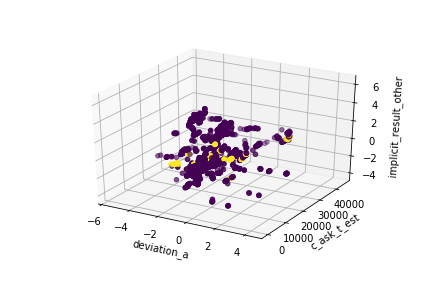

In [16]:
label=df['price_is_higher']

limit = 2000

xlabel='deviation_a'
ylabel='c_ask_t_est'
zlabel='implicit_result_other'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
scatter = Axes3D.scatter(ax,xs=df[xlabel][:limit],ys=df[ylabel][:limit],zs=df[zlabel][:limit],c=df['price_is_higher'][:limit])


<IPython.core.display.Javascript object>


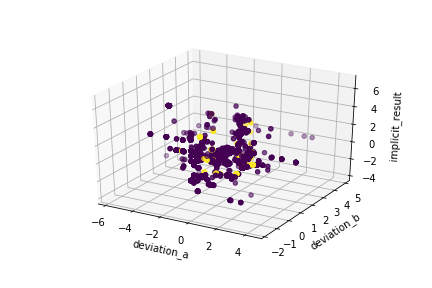

In [17]:
future_df = df.shift(-50)
df['time_delta'] = df.index.to_series().diff().dt.microseconds.div(1000, fill_value=0) # time delta feature in milliseconds
df['future_bid_a'] = future_df['bid_a']
df['price_is_higher'] = ((df['future_bid_a'] > df['ask_a'])).map(lambda x: 1*x) # Map true values to 1 and false to 0

label=df['price_is_higher']
colors = ['red', 'green']

limit = 3000

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('deviation_a')
ax.set_ylabel('deviation_b')
ax.set_zlabel('implicit_result')
scatter = Axes3D.scatter(ax,xs=df['deviation_a'][:limit],ys=df['deviation_b'][:limit],zs=df['implicit_result'][:limit],c=df['price_is_higher'][:limit])


In [18]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [19]:
df = df.dropna()
X = df.loc[:, feature_cols[:-2]]
X.shape

(9094, 16)

In [20]:
y = df['price_is_higher']
y.shape

(9094,)

<IPython.core.display.Javascript object>


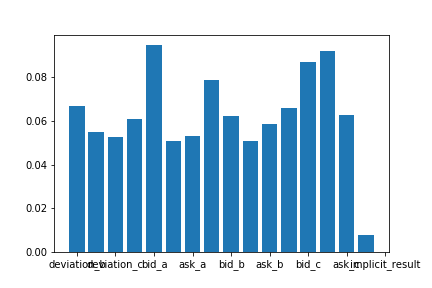

In [21]:
clf = ExtraTreesClassifier()
clf = clf.fit(X,y)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(range(len(clf.feature_importances_)),clf.feature_importances_)
ax.set_xticklabels(feature_cols[:-2])
fig.show()

In [22]:
print(sorted([(feature_cols[i],int(1000*x)) for i, x in enumerate(list(clf.feature_importances_))], key=lambda x: x[1], reverse=True))

[('ask_a', 94), ('c_bid_t_est', 92), ('implicit_result_other', 86), ('bid_c', 78), ('deviation_a', 66), ('c_ask_t_est', 65), ('ask_c', 62), ('a_ask_t_est', 62), ('bid_a', 60), ('a_bid_t_est', 58), ('deviation_b', 54), ('ask_b', 53), ('deviation_c', 52), ('bid_b', 50), ('implicit_result', 50), ('time_delta', 7)]


In [23]:
X.isna().any()

deviation_a              False
deviation_b              False
deviation_c              False
bid_a                    False
ask_a                    False
bid_b                    False
ask_b                    False
bid_c                    False
ask_c                    False
implicit_result          False
a_bid_t_est              False
c_ask_t_est              False
implicit_result_other    False
c_bid_t_est              False
a_ask_t_est              False
time_delta               False
dtype: bool

<IPython.core.display.Javascript object>


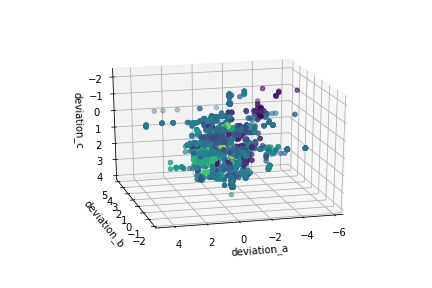

In [32]:
df['profit_bool'] = ((df['implicit_result'] > 1.0).map(lambda x: 1*x))

limit = 5000

xlabel='deviation_a'
ylabel='deviation_b'
zlabel='deviation_c'

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
scatter = Axes3D.scatter(ax,xs=df[xlabel][:limit],ys=df[ylabel][:limit],zs=df[zlabel][:limit],c=df['implicit_result_other'][:limit])
